In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SGD:
    def __init__(self,b):
        self.fitted=False
        self.b=b
        self.alpha=0
        
    def fit(self, X, y, alpha=7, n_epochs=30, lam=0, plot = False):
        self.X =X
        self.y = y
        self.n, self.d = X.shape
        self.alpha = alpha
        self.w = np.zeros(self.d) # initial hypothesis
        loss = np.zeros(n_epochs)
        for t in range(n_epochs):
            self.alpha/=(t+1)
            p = np.random.permutation(self.n)
            # compute current loss
            loss[t] = np.mean(np.log(1 + np.exp(-self.y[p[:self.b]]
                                        * np.dot(self.X[p[:self.b]], self.w))))
            print("Loss: "+str(loss[t]))
            # compute (sub)gradient (wrt i-th data point)
            grad = np.zeros(self.d)
            for i in range(self.b):
                grad += np.exp(-self.y[p[i]]*np.dot(self.X[p[i]], self.w))*(np.dot(-self.y[p[i]], self.X[p[i]])) / (1+np.exp(-self.y[p[i]]*np.dot(self.X[p[i]], self.w)))
            grad/=self.b
            #print(np.dot(-self.y[p[:self.b]].T, self.X[p[:self.b]]).shape)
            # grad = np.mean(np.exp(-self.y[p[:self.b]]*np.dot(self.X[p[:self.b]], self.w))*(np.multiply(-self.y[p[:self.b]], self.X[p[:self.b]])) / (1+np.exp(-self.y[p[:self.b]]*np.dot(self.X[p[:self.b]], self.w))))
            self.w = self.w - self.alpha*grad
        self.fitted=True
        if plot:
            plt.plot(loss)
            plt.yscale('log')
            plt.xscale('log')
            plt.ylabel('loss')
            plt.xlabel('iterations')
            plt.show()
        
        
    def predict(self,X): 
        if not self.fitted:
            raise Exception("The model is not trained!")
        return np.matmul(X, self.w)

In [143]:
class SQN():
    def __init__(self,b,bH,M = 5, L = 20, alpha = 7):
        self.fitted=False
        self.w = 0
        self.M = M
        self.L = L
        self.alpha = alpha
        self.b=b
        self.bH=bH
    def fit(self, X, y, n_epochs=30, plot = False):
        self.X =X
        self.y = y
        self.n, self.d = X.shape
        self.t = -1
        self.w = np.zeros(self.d)  
        self.w_t = [] 
        self.s_t = []
        self.y_t = []
        loss = np.zeros(n_epochs)
        self.w_t.append(np.zeros(self.d))
        # cycle through all training data n_epochs times
        for k in range(n_epochs):
            p = np.random.permutation(self.n)
            # cycle through training examples (in randomly permuted order)
            # compute current loss
            loss[k] = np.mean(np.log(1 + np.exp(-self.y[p[:self.b]]
                                        * np.dot(self.X[p[:self.b]], self.w))))
            #print("Loss: "+str(loss[k]))
            # compute stoachastic gradient
            grad = np.zeros(self.d)
            for i in range(self.b):
                grad += np.exp(-self.y[p[i]]*np.dot(self.X[p[i]], self.w))*(np.dot(-self.y[p[i]], self.X[p[i]])) / (1+np.exp(-self.y[p[i]]*np.dot(self.X[p[i]], self.w)))
            grad/=self.b
            self.w_t[-1] += self.w
            if k<2*self.L:
                self.w = self.w - self.alpha*grad
            else:
                ##calculating H_t, Algorithm 2
                print(self.s_t[-1])
                m = min(self.t,self.M)
                H = np.dot(self.s_t[-1],self.y_t[-1])/np.dot(self.y_t[-1],self.y_t[-1])*np.eye(self.d)
                for j in range(m,0,-1):
                    rho = 1/np.dot(self.y_t[-j],self.s_t[-j])
                    H = (np.eye(self.d) - rho*np.matmul(self.s_t[-j],self.y_t[-j].T))*H*(np.eye(self.d) - rho*np.matmul(self.y_t[-j],self.s_t[-j].T)) + rho*np.matmul(self.s_t[-j],self.s_t[-j].T)
                H_t = H
                ##
                self.w = self.w - self.alpha*np.matmul(H_t,grad)
            self.alpha/=(k+1)
            if np.mod(k,self.L-1)==0 and k>0:
                self.t += 1
                self.w_t[-1]/= self.L
                if self.t>0:
                    S_H = p[:self.bH]
                    self.s_t.append(self.w_t[-1] - self.w_t[-2])
                    self.y_t.append(np.zeros(self.d))
                    for i in range(self.d):
                        self.y_t[-1] +=((np.dot(-self.y[p[i]], self.X[p[i]][i]))*(np.dot(-self.y[p[i]], self.X[p[i]]))*np.exp(-self.y[p[i]]*np.dot(self.X[p[i]], self.w))*(1+np.exp(-self.y[p[i]]*np.dot(self.X[p[i]], self.w))) - ((np.dot(-self.y[p[i]], self.X[p[i]][i]))*(np.dot(-self.y[p[i]], self.X[p[i]]))*np.exp(-self.y[p[i]]*np.dot(self.X[p[i]], self.w))**2)*self.s_t[-1][i])/(1+np.exp(-self.y[p[i]]*np.dot(self.X[p[i]], self.w)))**2
                self.w_t.append(np.zeros(self.d))
            self.fitted=True
        if plot:
            plt.plot(loss)
            plt.yscale('log')
            #plt.xscale('log')
            plt.ylabel('loss')
            plt.xlabel('iterations')
            plt.show()

            #self.w = self.w - self.alpha*self.grad

In [2]:
from sklearn import datasets
digits = datasets.load_digits(n_class=2) 
X = digits.data
X=X[:150,:]
y = digits.target
y = y[:150]
a = SQN(b=100,bH=100,M=5,L=20,alpha=7)
#X = np.random.rand(5000,50)
#y = np.random.randint(2,size=5000)
SQN.fit(a,X,y,n_epochs=100,plot=True)

TypeError: an integer is required (got type bytes)

Loss: 0.6931471805599453
Loss: 0.3535050855849651
Loss: 0.4297512616558251
Loss: 0.3881624330800106
Loss: 0.35350507294981043
Loss: 0.42281979822835053
Loss: 0.32577918385035737
Loss: 0.34657361120503066
Loss: 0.360436547081795
Loss: 0.3049847729677276
Loss: 0.40202537648593634
Loss: 0.3535050834051215
Loss: 0.37429949357128
Loss: 0.3742994923617019
Loss: 0.38123097448818044
Loss: 0.30498477211328145
Loss: 0.39509390905473907
Loss: 0.3257791925352076
Loss: 0.35350508620852195
Loss: 0.3742994929176551
Loss: 0.32577918715885223
Loss: 0.33964213693833606
Loss: 0.2564644764685902
Loss: 0.36043654559993377
Loss: 0.39509390156305535
Loss: 0.3673680164353755
Loss: 0.34657361325411734
Loss: 0.35350507608853726
Loss: 0.36043654759225163
Loss: 0.33964213701424806
Loss: 0.3396421382320874
Loss: 0.422819791112004
Loss: 0.2495330045031965
Loss: 0.3049847683464459
Loss: 0.3465736039157597
Loss: 0.32577918850351656
Loss: 0.34657360790514635
Loss: 0.31191624854631284
Loss: 0.3535050718947087
Loss: 0.2

Loss: 0.36736801356891924
Loss: 0.33964213583845465
Loss: 0.3327106751056112
Loss: 0.29805329881219483
Loss: 0.2703274255911752
Loss: 0.3742995042965675
Loss: 0.26339594904560565
Loss: 0.3188477179741789
Loss: 0.353505081154254
Loss: 0.2911218295154161
Loss: 0.36043655973830147
Loss: 0.29112184027951094
Loss: 0.2980533260823598
Loss: 0.34657360482300886
Loss: 0.33271065857130855
Loss: 0.3257791899069337
Loss: 0.31884771482535373
Loss: 0.31884772672055367
Loss: 0.3327106671362246
Loss: 0.29112183318706514
Loss: 0.32577919136542893
Loss: 0.34657360217512434
Loss: 0.3881624358641379
Loss: 0.33271065491936186
Loss: 0.31191625643344983
Loss: 0.4089568467224584
Loss: 0.34657360305749735
Loss: 0.3535050790762853
Loss: 0.2980533091888741
Loss: 0.2772588866271413
Loss: 0.3327106662962781
Loss: 0.30498476847868183
Loss: 0.29112183498763494
Loss: 0.32577919152719603
Loss: 0.34657360437742213
Loss: 0.33964213039572444
Loss: 0.35350507719835705
Loss: 0.38816244206211026
Loss: 0.34657360594619063
Lo

Loss: 0.33964214054138714
Loss: 0.36736803002523166
Loss: 0.3950939099217186
Loss: 0.33964216057096097
Loss: 0.3535050729250346
Loss: 0.29112183215838405
Loss: 0.3535050799061622
Loss: 0.3604365507837788
Loss: 0.31191624025103526
Loss: 0.39509391535634836
Loss: 0.34657359908426216
Loss: 0.3535050845086819
Loss: 0.3881624286084483
Loss: 0.3742994907157675
Loss: 0.31884773504390684
Loss: 0.39509390559791796
Loss: 0.3465736047352887
Loss: 0.3396421350309416
Loss: 0.36043655025787247
Loss: 0.34657360258443104
Loss: 0.29805331514454925
Loss: 0.36043656101138516
Loss: 0.3742994859378591
Loss: 0.29112182709239226
Loss: 0.3535050834685668
Loss: 0.37429949563521214
Loss: 0.3604365444796129
Loss: 0.31191624380582256
Loss: 0.33964213810718163
Loss: 0.3950939172464144
Loss: 0.31884772029545366
Loss: 0.3327106678677106
Loss: 0.36736802621061043
Loss: 0.38123096920046656
Loss: 0.36736802009431885
Loss: 0.3119162589369815
Loss: 0.3812309603654491
Loss: 0.36043654988448154
Loss: 0.3881624376414207
Los

Loss: 0.36736802294338183
Loss: 0.27725888949617405
Loss: 0.31191624302090676
Loss: 0.3396421276575194
Loss: 0.3673680155829603
Loss: 0.3049847759953471
Loss: 0.3742994890599367
Loss: 0.3812309601092299
Loss: 0.3604365579631017
Loss: 0.32577918561855507
Loss: 0.3535050750974137
Loss: 0.36736801362227905
Loss: 0.39509390233887026
Loss: 0.2841903707915477
Loss: 0.36736801779426337
Loss: 0.3535050885542826
Loss: 0.3950939071169788
Loss: 0.3396421339987515
Loss: 0.38816243483117646
Loss: 0.36736802711483724
Loss: 0.34657359802111415
Loss: 0.3257791965429883
Loss: 0.29112183317214557
Loss: 0.38816243563775
Loss: 0.35350507381745966
Loss: 0.34657361008171733
Loss: 0.31191624725797235
Loss: 0.3535050854985647
Loss: 0.34657362783975365
Loss: 0.3535050811185873
Loss: 0.33271066118111764
Loss: 0.31191624678874896
Loss: 0.3950939037571979
Loss: 0.3327106565199307
Loss: 0.3535050722809913
Loss: 0.31191624663650025
Loss: 0.36736801456906254
Loss: 0.3396421403451194
Loss: 0.3119162514515693
Loss: 0.

Loss: 0.35350507450572555
Loss: 0.2633959693384352
Loss: 0.3396421309254922
Loss: 0.2980533063054598
Loss: 0.3396421501793415
Loss: 0.41588832048410423
Loss: 0.3119162589476146
Loss: 0.35350506995738606
Loss: 0.2841903677543331
Loss: 0.33271066303783814
Loss: 0.3812309591917207
Loss: 0.3881624376561318
Loss: 0.3188477179486792
Loss: 0.4228197891696373
Loss: 0.3257791938980224
Loss: 0.31191625845104765
Loss: 0.35350507679576515
Loss: 0.318847720801448
Loss: 0.3465736029569182
Loss: 0.37429948851642914
Loss: 0.332710662726193
Loss: 0.3742995003082876
Loss: 0.32577918701888836
Loss: 0.32577918784801
Loss: 0.32577920982904324
Loss: 0.3604365456306909
Loss: 0.3257791901267621
Loss: 0.34657361036229384
Loss: 0.31191624798284584
Loss: 0.3188477263662953
Loss: 0.3673680285256882
Loss: 0.374299485738053
Loss: 0.3604365494247533
Loss: 0.36043655115422835
Loss: 0.3257791902741707
Loss: 0.36736801840679445
Loss: 0.37429948972755483
Loss: 0.3327106624519816
Loss: 0.41588831838983836
Loss: 0.3535050

Loss: 0.3188477168113849
Loss: 0.36043654604869985
Loss: 0.2841903628566719
Loss: 0.36736802265397045
Loss: 0.395093906558133
Loss: 0.4020253847158846
Loss: 0.36736802142042646
Loss: 0.29112185106294847
Loss: 0.325779196423848
Loss: 0.33271066416931183
Loss: 0.3257791941230746
Loss: 0.3119162476142376
Loss: 0.3188477280120777
Loss: 0.36736802248060535
Loss: 0.3604365443490012
Loss: 0.3327106693435453
Loss: 0.3465736106128261
Loss: 0.318847713887263
Loss: 0.3396421341355154
Loss: 0.36043655416026515
Loss: 0.298053311556469
Loss: 0.33964214226937733
Loss: 0.2841903596697723
Loss: 0.3327106617278266
Loss: 0.31884771977843973
Loss: 0.36736802398266993
Loss: 0.3950938988744715
Loss: 0.2980533078400159
Loss: 0.3950939056150955
Loss: 0.35350507989896945
Loss: 0.33964213825938055
Loss: 0.3812309613233397
Loss: 0.34657359917340663
Loss: 0.3465736026336668
Loss: 0.3049847671565987
Loss: 0.3396421330459083
Loss: 0.3535050955778056
Loss: 0.3049847734991014
Loss: 0.33964213104119123
Loss: 0.3327106

Loss: 0.40895685537196913
Loss: 0.31884771518878896
Loss: 0.33271065817773526
Loss: 0.3396421353040435
Loss: 0.34657360986654573
Loss: 0.3673680262213619
Loss: 0.32577920101724644
Loss: 0.3950939059649673
Loss: 0.3604365539872791
Loss: 0.3465736091003164
Loss: 0.3604365474467143
Loss: 0.32577918737151246
Loss: 0.3396421411824519
Loss: 0.40202537576468855
Loss: 0.3049847721173579
Loss: 0.3881624275442408
Loss: 0.360436552008672
Loss: 0.32577919812295775
Loss: 0.3119162496217857
Loss: 0.3119162539140043
Loss: 0.3188477202421863
Loss: 0.3257791981264935
Loss: 0.34657360554828515
Loss: 0.37429948627308646
Loss: 0.3188477212237099
Loss: 0.33964212802153243
Loss: 0.31884772634186265
Loss: 0.2911218353959749
Loss: 0.38816243941649975
Loss: 0.29112182990112556
Loss: 0.3119162505225298
Loss: 0.2911218386716359
Loss: 0.32577919826027213
Loss: 0.3257791871212408
Loss: 0.4020253732481123
Loss: 0.3604365489504492
Loss: 0.3257791845040635
Loss: 0.39509390493458474
Loss: 0.29805329762180505
Loss: 0.3

Loss: 0.31884771732740896
Loss: 0.38123095783561056
Loss: 0.26339594414074147
Loss: 0.2841903675919007
Loss: 0.3396421315162364
Loss: 0.38816244842343295
Loss: 0.29805330674938385
Loss: 0.3673680141183872
Loss: 0.42975126588719725
Loss: 0.33964213894126155
Loss: 0.31884772696991
Loss: 0.3465736017279245
Loss: 0.3327106589861296
Loss: 0.3049847703727455
Loss: 0.34657360499171624
Loss: 0.3950939014985041
Loss: 0.3673680228040115
Loss: 0.38816243274022855
Loss: 0.3327106661215293
Loss: 0.32577919028448443
Loss: 0.318847718477495
Loss: 0.3950939147252871
Loss: 0.38816243780040166
Loss: 0.339642133189791
Loss: 0.3812309654335365
Loss: 0.3742994905054509
Loss: 0.34657361198984515
Loss: 0.37429949835633586
Loss: 0.3604365481542461
Loss: 0.36736802014798464
Loss: 0.3535050795511291
Loss: 0.38123096851455984
Loss: 0.3812309683559304
Loss: 0.3604365425063321
Loss: 0.36736801815870884
Loss: 0.36736802644590794
Loss: 0.3396421363193455
Loss: 0.4158883240154018
Loss: 0.3673680222565253
Loss: 0.3396

Loss: 0.3396421298444689
Loss: 0.3950939007328242
Loss: 0.33964213011647915
Loss: 0.3119162460656227
Loss: 0.318847718825381
Loss: 0.33964212842286456
Loss: 0.33964213928497405
Loss: 0.3119162421032359
Loss: 0.3881624315970583
Loss: 0.31884772112142923
Loss: 0.3812309614465048
Loss: 0.39509390197198974
Loss: 0.3673680132927209
Loss: 0.3535050773640833
Loss: 0.3535050779028641
Loss: 0.3881624327660761
Loss: 0.38123096903483555
Loss: 0.36736802156788045
Loss: 0.3257791905655717
Loss: 0.35350508163288585
Loss: 0.32577919397649974
Loss: 0.34657361102456646
Loss: 0.2980533001418464
Loss: 0.3673680281912776
Loss: 0.4020253726680921
Loss: 0.28419036591410995
Loss: 0.34657359887244854
Loss: 0.41588831952702243
Loss: 0.3465736073063206
Loss: 0.3396421384688742
Loss: 0.31884772344135215
Loss: 0.4020253747207015
Loss: 0.31191624599281814
Loss: 0.3881624402460952
Loss: 0.3327106610632051
Loss: 0.30498477505265553
Loss: 0.3327106633060384
Loss: 0.34657360518226715
Loss: 0.28419035865853554
Loss: 0.

Loss: 0.3812309658118196
Loss: 0.3257791905428487
Loss: 0.3812309743745898
Loss: 0.32577920173866554
Loss: 0.32577919582123244
Loss: 0.3604365468598498
Loss: 0.4020253810614486
Loss: 0.31191625375842136
Loss: 0.3604365529768485
Loss: 0.3742994884405736
Loss: 0.3465736033319895
Loss: 0.38816243450018134
Loss: 0.3465736088512393
Loss: 0.388162433539153
Loss: 0.41588831712876584
Loss: 0.3257791940256307
Loss: 0.29112184390728
Loss: 0.3535050856996277
Loss: 0.3257791931293144
Loss: 0.33271066699616564
Loss: 0.31884771960065866
Loss: 0.3950939008500539
Loss: 0.3742994988114567
Loss: 0.3742994918550804
Loss: 0.3465735994001393
Loss: 0.4020253756298455
Loss: 0.3812309632694037
Loss: 0.36043654596509006
Loss: 0.38123097861656413
Loss: 0.34657360430622236
Loss: 0.38123097159358516
Loss: 0.33964212847462716
Loss: 0.3465735996301398
Loss: 0.28419035672097154
Loss: 0.29805330701058685
Loss: 0.2980533048637324
Loss: 0.3327106641182443
Loss: 0.31884772257135424
Loss: 0.3257791937975537
Loss: 0.36043

Loss: 0.3535050767894481
Loss: 0.36043654621472554
Loss: 0.3673680220538334
Loss: 0.2841903616225938
Loss: 0.3327106676185737
Loss: 0.4020253748878482
Loss: 0.304984777498039
Loss: 0.3950939234347267
Loss: 0.32577919551658946
Loss: 0.33964212855136444
Loss: 0.3396421326929579
Loss: 0.31884771835060616
Loss: 0.3465736111396264
Loss: 0.3465736063633353
Loss: 0.3673680181222671
Loss: 0.31884772389405563
Loss: 0.3257791930474931
Loss: 0.3950939058010556
Loss: 0.33271066633797525
Loss: 0.4228197875897579
Loss: 0.3049847743387135
Loss: 0.3465736036118887
Loss: 0.37429950191467204
Loss: 0.3535050755275205
Loss: 0.4020253746799002
Loss: 0.3535050744250851
Loss: 0.25646447703625225
Loss: 0.33964213299491214
Loss: 0.31884771420770824
Loss: 0.3812309619637684
Loss: 0.3396421354285085
Loss: 0.3396421289359217
Loss: 0.38816243129065287
Loss: 0.41588832194950215
Loss: 0.3812309631895594
Loss: 0.33271066783592884
Loss: 0.33964214056056663
Loss: 0.3049847802849842
Loss: 0.3188477215578964
Loss: 0.3327

Loss: 0.3673680199729705
Loss: 0.38123096123261674
Loss: 0.388162434025585
Loss: 0.38123096095957754
Loss: 0.3604365482246704
Loss: 0.3465736012873731
Loss: 0.4158883149633715
Loss: 0.39509390606572853
Loss: 0.3396421334092701
Loss: 0.3950938994359803
Loss: 0.3812309561671953
Loss: 0.3465736007201997
Loss: 0.3742994881219459
Loss: 0.3950939068755588
Loss: 0.3950939253105467
Loss: 0.3188477153732972
Loss: 0.3604365482155342
Loss: 0.3396421332020427
Loss: 0.34657361895445865
Loss: 0.3049847695798993
Loss: 0.33271066895180385
Loss: 0.3257791902706117
Loss: 0.3327106617799821
Loss: 0.3396421442335722
Loss: 0.29112184076659653
Loss: 0.3673680229957768
Loss: 0.3535050802001136
Loss: 0.3327106765380409
Loss: 0.3257791875968588
Loss: 0.360436543175963
Loss: 0.32577918669275063
Loss: 0.4158883191039815
Loss: 0.284190356839571
Loss: 0.3881624355554118
Loss: 0.38816243752881957
Loss: 0.31191624013312835
Loss: 0.4366827331178465
Loss: 0.28419037498127864
Loss: 0.34657361113034857
Loss: 0.415888321

Loss: 0.32577918909036085
Loss: 0.3812309607572893
Loss: 0.3396421292039147
Loss: 0.3535050719126446
Loss: 0.32577919226494884
Loss: 0.3396421409975627
Loss: 0.35350508083417637
Loss: 0.3535050766328083
Loss: 0.34657360511257407
Loss: 0.33964213605963245
Loss: 0.3604365446603406
Loss: 0.3881624400183486
Loss: 0.38816243506102305
Loss: 0.3535051034945085
Loss: 0.374299488654399
Loss: 0.35350507418331417
Loss: 0.41588833003150855
Loss: 0.3604365489988555
Loss: 0.36043655875702646
Loss: 0.33271068030660655
Loss: 0.33964213535496995
Loss: 0.37429949483924063
Loss: 0.3742994979315975
Loss: 0.29805332040778526
Loss: 0.374299491669508
Loss: 0.40895684438869717
Loss: 0.3950939073570956
Loss: 0.270327416723964
Loss: 0.3119162556669098
Loss: 0.40202538119823494
Loss: 0.4436142065983141
Loss: 0.3188477140763541
Loss: 0.36736801834924987
Loss: 0.3812309592493433
Loss: 0.3742994915728303
Loss: 0.3812309681912638
Loss: 0.35350507580439905
Loss: 0.3119162477145061
Loss: 0.30498478502438864
Loss: 0.41

Loss: 0.30498476934342045
Loss: 0.388162435078525
Loss: 0.3812309665950362
Loss: 0.37429949179223226
Loss: 0.4366827352086861
Loss: 0.3049847929050522
Loss: 0.34657360919755265
Loss: 0.339642138661927
Loss: 0.3257791961951368
Loss: 0.35350508439110745
Loss: 0.4089568642619508
Loss: 0.367368012421144
Loss: 0.3257791927893161
Loss: 0.36736802355772874
Loss: 0.3119162498528207
Loss: 0.42281979729008556
Loss: 0.3119162520456023
Loss: 0.32577918740613704
Loss: 0.3535050766894532
Loss: 0.3465736102411147
Loss: 0.3396421353744175
Loss: 0.2703274199941943
Loss: 0.3535050764964408
Loss: 0.33271066022923845
Loss: 0.3812309601143887
Loss: 0.3604365511599085
Loss: 0.33964214328047937
Loss: 0.3604365489382591
Loss: 0.3049847779011243
Loss: 0.3604365451017823
Loss: 0.3465736048521871
Loss: 0.3119162541952931
Loss: 0.3396421343200945
Loss: 0.311916254908242
Loss: 0.3812309684952065
Loss: 0.35350507033645945
Loss: 0.3396421444931169
Loss: 0.3673680249251732
Loss: 0.3950939216147537
Loss: 0.29112183339

Loss: 0.2980533060563705
Loss: 0.3604365470440955
Loss: 0.3742994907735611
Loss: 0.35350507403507825
Loss: 0.3535050712365438
Loss: 0.33964212899911717
Loss: 0.33964213185550457
Loss: 0.332710667250242
Loss: 0.3257791875142303
Loss: 0.3257791886739325
Loss: 0.38816243418988244
Loss: 0.34657361034665174
Loss: 0.38816242830791675
Loss: 0.3535050849840571
Loss: 0.3881624319997731
Loss: 0.3188477139189673
Loss: 0.3535050761456013
Loss: 0.3881624345968472
Loss: 0.4158883240331109
Loss: 0.3327106722042523
Loss: 0.33271065921794724
Loss: 0.33271065909818587
Loss: 0.2980533016478176
Loss: 0.367368018343602
Loss: 0.33964214935711284
Loss: 0.3881624315022525
Loss: 0.36736803508075844
Loss: 0.38123098032228386
Loss: 0.38816244116867793
Loss: 0.3257791847967477
Loss: 0.381230963668292
Loss: 0.34657360112965085
Loss: 0.33964213222828243
Loss: 0.35350508430858646
Loss: 0.35350508172479633
Loss: 0.3049847824802653
Loss: 0.3257791901021374
Loss: 0.28419037411988163
Loss: 0.28419036342604953
Loss: 0.30

Loss: 0.3119162510474647
Loss: 0.38816242944314333
Loss: 0.318847718660445
Loss: 0.3465736098338793
Loss: 0.26339594372725567
Loss: 0.38816243281319224
Loss: 0.3465736028553726
Loss: 0.38123095974278187
Loss: 0.33964213438568275
Loss: 0.2980533120126616
Loss: 0.37429948923689177
Loss: 0.3257792021433597
Loss: 0.29112183484967236
Loss: 0.3950939163133833
Loss: 0.37429949050048306
Loss: 0.3396421371104483
Loss: 0.40895686801374886
Loss: 0.3742994884317976
Loss: 0.3742995027663953
Loss: 0.3742994939855599
Loss: 0.360436545796157
Loss: 0.3950939074522822
Loss: 0.2911218260092086
Loss: 0.37429949262847695
Loss: 0.37429948882059805
Loss: 0.36043655259231266
Loss: 0.33271066410717276
Loss: 0.3465736000723193
Loss: 0.32577920219247825
Loss: 0.3465735983947931
Loss: 0.4020253754918375
Loss: 0.3465736057282562
Loss: 0.36043655358189786
Loss: 0.34657361410323284
Loss: 0.3950939004769542
Loss: 0.31191626180931026
Loss: 0.374299497620207
Loss: 0.3535050715325782
Loss: 0.3257791925529303
Loss: 0.346

Loss: 0.3465736042482227
Loss: 0.34657360362310163
Loss: 0.3465736015929263
Loss: 0.311916252898981
Loss: 0.3257791905261184
Loss: 0.3396421282858897
Loss: 0.3812309613336037
Loss: 0.3742994917907476
Loss: 0.3119162538522165
Loss: 0.3673680148557317
Loss: 0.3881624398146492
Loss: 0.3465736222699276
Loss: 0.38816243386099053
Loss: 0.3604365436200922
Loss: 0.35350507863144826
Loss: 0.3742994874400509
Loss: 0.3604365450462156
Loss: 0.3535050784708044
Loss: 0.4297512651124205
Loss: 0.37429949546412256
Loss: 0.3049847801095142
Loss: 0.3049847775894654
Loss: 0.33271067195514037
Loss: 0.4228197937232098
Loss: 0.36736801597619234
Loss: 0.3049847751415517
Loss: 0.3257791956674156
Loss: 0.30498478196480183
Loss: 0.3257792081011288
Loss: 0.3327106762963612
Loss: 0.3257791946587785
Loss: 0.30498477724394546
Loss: 0.35350508111813206
Loss: 0.3327106630442159
Loss: 0.36043655296542376
Loss: 0.30498477068100543
Loss: 0.34657361018027444
Loss: 0.32577920003755073
Loss: 0.38123096713476834
Loss: 0.3673

Loss: 0.3535050784681467
Loss: 0.36736801568182004
Loss: 0.311916271186097
Loss: 0.35350508729712926
Loss: 0.3188477132829553
Loss: 0.3188477259972732
Loss: 0.367368022157596
Loss: 0.3881624340711305
Loss: 0.3119162522853742
Loss: 0.33271066903943414
Loss: 0.42975126335242203
Loss: 0.42975126040983624
Loss: 0.42281979532197594
Loss: 0.3881624341657831
Loss: 0.29805330431697674
Loss: 0.2911218378209519
Loss: 0.32577919731635646
Loss: 0.3812309639243214
Loss: 0.3188477155485326
Loss: 0.3465736034250239
Loss: 0.28419036791072916
Loss: 0.36736803946816876
Loss: 0.2841903692948272
Loss: 0.33271067864547726
Loss: 0.2980533063650041
Loss: 0.3327106735038903
Loss: 0.3257791879649434
Loss: 0.33964213704749363
Loss: 0.3604365477393328
Loss: 0.3881624346726684
Loss: 0.3742994906993403
Loss: 0.2911218385695957
Loss: 0.36043655498712923
Loss: 0.34657360395583225
Loss: 0.34657361438300854
Loss: 0.36043655113865714
Loss: 0.33271066814980105
Loss: 0.4089568561501602
Loss: 0.37429949126528717
Loss: 0.3

Loss: 0.3950939086540015
Loss: 0.3881624315383133
Loss: 0.37429949148406705
Loss: 0.3327106572719081
Loss: 0.42975126767089167
Loss: 0.3535050789496627
Loss: 0.35350507621233623
Loss: 0.31191625095198
Loss: 0.304984772711221
Loss: 0.3465736010220891
Loss: 0.3812309653299547
Loss: 0.27725888613211574
Loss: 0.35350507645952256
Loss: 0.3881624373449954
Loss: 0.36736801942094827
Loss: 0.2980533092537628
Loss: 0.3812309606318179
Loss: 0.34657360035204915
Loss: 0.44361420067893365
Loss: 0.2841903626642435
Loss: 0.353505076605655
Loss: 0.3465736031163265
Loss: 0.367368016806641
Loss: 0.3257792015114332
Loss: 0.332710670102759
Loss: 0.3327106623703237
Loss: 0.3327106688895758
Loss: 0.3396421320068997
Loss: 0.3673680309896801
Loss: 0.3950939107736014
Loss: 0.3673680140543979
Loss: 0.33271068065592935
Loss: 0.31191624586940075
Loss: 0.3188477229432931
Loss: 0.3742994857147389
Loss: 0.35350507442468443
Loss: 0.37429949267594975
Loss: 0.31191624656172534
Loss: 0.2980533074431376
Loss: 0.3535050790

Loss: 0.3950939157122614
Loss: 0.33964213010522537
Loss: 0.3604365463044218
Loss: 0.36736803215257013
Loss: 0.34657360099332524
Loss: 0.32577919325776167
Loss: 0.35350507388477026
Loss: 0.37429949221348885
Loss: 0.3465735995746833
Loss: 0.3812309623621211
Loss: 0.33271066412981054
Loss: 0.360436554277055
Loss: 0.3673680211588211
Loss: 0.38123096109326426
Loss: 0.33964213906630664
Loss: 0.4297512700351415
Loss: 0.3119162542501005
Loss: 0.36736801915784834
Loss: 0.33271066204965044
Loss: 0.3950939093001585
Loss: 0.3188477138544774
Loss: 0.33271066603461763
Loss: 0.3812309571474011
Loss: 0.3396421461362253
Loss: 0.38816243871213196
Loss: 0.4089568506147856
Loss: 0.4020253744622594
Loss: 0.32577918949503953
Loss: 0.35350507791468183
Loss: 0.37429949002474344
Loss: 0.3950939041353348
Loss: 0.31191625185434735
Loss: 0.3535050758060116
Loss: 0.4505456785874067
Loss: 0.3742995012854901
Loss: 0.3396421440057764
Loss: 0.3535050755008983
Loss: 0.3881624330553318
Loss: 0.37429949119144185
Loss: 0.

Loss: 0.3257791875480477
Loss: 0.38816243748860635
Loss: 0.3742994902743154
Loss: 0.3188477141799013
Loss: 0.35350508525108865
Loss: 0.3327106560147493
Loss: 0.30498478023133413
Loss: 0.3535050839032023
Loss: 0.38123096061793
Loss: 0.2980533081121656
Loss: 0.4089568516939168
Loss: 0.3673680286597934
Loss: 0.36043655146288395
Loss: 0.29112182557680005
Loss: 0.35350507330769143
Loss: 0.3535050807995857
Loss: 0.3535050786271457
Loss: 0.36736802137440594
Loss: 0.3327106734626603
Loss: 0.34657360038062307
Loss: 0.2426015568982682
Loss: 0.36736801752970843
Loss: 0.36736801303336597
Loss: 0.3604365703378988
Loss: 0.3257791898382196
Loss: 0.374299490588805
Loss: 0.3257791998909255
Loss: 0.36043655009190284
Loss: 0.35350507529552866
Loss: 0.3812309677620591
Loss: 0.3535050877106449
Loss: 0.36736802225917836
Loss: 0.3881624310828677
Loss: 0.3327106593404878
Loss: 0.3673680237487959
Loss: 0.3881624304328093
Loss: 0.3465736170076296
Loss: 0.34657361144752774
Loss: 0.32577918935804767
Loss: 0.36043

Loss: 0.33271067948803584
Loss: 0.3604365520615415
Loss: 0.27725889240510765
Loss: 0.2772589019985533
Loss: 0.36043655013832276
Loss: 0.3396421329605653
Loss: 0.3257791913955763
Loss: 0.3673680204639993
Loss: 0.3535050783744731
Loss: 0.35350507911252466
Loss: 0.3950939074876696
Loss: 0.3188477219331771
Loss: 0.3535050834999858
Loss: 0.3188477266648718
Loss: 0.30498477607071883
Loss: 0.42281979059334257
Loss: 0.3881624402865548
Loss: 0.35350508140788256
Loss: 0.33271066166565616
Loss: 0.35350507240135776
Loss: 0.39509390349526
Loss: 0.2980533001600933
Loss: 0.3812309566873907
Loss: 0.33964212809383176
Loss: 0.3742994904235601
Loss: 0.38816243712651755
Loss: 0.3950938991921976
Loss: 0.3465736166508045
Loss: 0.3604365418335979
Loss: 0.38816244139359435
Loss: 0.3327106579693859
Loss: 0.3604365444677116
Loss: 0.34657360417305716
Loss: 0.33964213187354764
Loss: 0.3465736049642936
Loss: 0.2911218304720752
Loss: 0.3327106593360877
Loss: 0.35350507804112785
Loss: 0.4020253797804033
Loss: 0.3119

Loss: 0.3049847698301208
Loss: 0.32577919213676565
Loss: 0.3465736021795338
Loss: 0.33964213454369074
Loss: 0.33964213049906655
Loss: 0.33964213873075516
Loss: 0.3881624325003324
Loss: 0.2980533025083529
Loss: 0.339642130508383
Loss: 0.31884771813095414
Loss: 0.4020253709029651
Loss: 0.35350507401046
Loss: 0.30498477158251097
Loss: 0.3396421364081041
Loss: 0.2980532979316975
Loss: 0.32577919743916434
Loss: 0.42281979610729925
Loss: 0.36736802931762697
Loss: 0.3049847822327628
Loss: 0.3604365483963023
Loss: 0.3119162513687293
Loss: 0.33964213599892845
Loss: 0.3465736006929102
Loss: 0.38123095981608424
Loss: 0.40202537246939835
Loss: 0.33964214769390727
Loss: 0.3396421323560992
Loss: 0.3673680261816051
Loss: 0.35350507913467155
Loss: 0.36043654528412633
Loss: 0.3119162489261143
Loss: 0.3188477157511832
Loss: 0.35350508303890377
Loss: 0.3257791936135151
Loss: 0.3465736028272076
Loss: 0.3950939044037767
Loss: 0.3673680168855588
Loss: 0.35350507205839143
Loss: 0.3742994892779143
Loss: 0.318

Loss: 0.3188477209518681
Loss: 0.3465736013478297
Loss: 0.31884771590988864
Loss: 0.367368024201721
Loss: 0.38123096589201977
Loss: 0.38123096492323666
Loss: 0.3812309625336121
Loss: 0.34657361176939716
Loss: 0.3049847766767015
Loss: 0.3673680235506157
Loss: 0.28419036064522607
Loss: 0.27725889324608494
Loss: 0.3742994920430467
Loss: 0.2841903626353479
Loss: 0.3881624301826707
Loss: 0.3049847743092273
Loss: 0.35350508093854427
Loss: 0.30498478346414304
Loss: 0.3327106591726816
Loss: 0.33964214589668573
Loss: 0.3465736014812403
Loss: 0.3742994922403821
Loss: 0.32577918821114926
Loss: 0.4505456771055346
Loss: 0.33271066141021743
Loss: 0.32577919226236607
Loss: 0.33964212739888966
Loss: 0.36043654489607585
Loss: 0.3604365487626019
Loss: 0.37429949537114765
Loss: 0.41588831872288123
Loss: 0.2703274135582419
Loss: 0.3049847988646071
Loss: 0.29112183007971154
Loss: 0.3396421360369421
Loss: 0.36043654762363403
Loss: 0.3327106631604518
Loss: 0.3604365645586441
Loss: 0.38123096010861784
Loss: 0

Loss: 0.3673680166460804
Loss: 0.3327106573024025
Loss: 0.33271066535088345
Loss: 0.3673680208125274
Loss: 0.3881624367570153
Loss: 0.3396421503727465
Loss: 0.3396421330679454
Loss: 0.31191625144830404
Loss: 0.37429949404843993
Loss: 0.31884773299278235
Loss: 0.3327106606140832
Loss: 0.35350507136258996
Loss: 0.40202537892492274
Loss: 0.34657360024925227
Loss: 0.3742995062987957
Loss: 0.40895685081451555
Loss: 0.37429949500823795
Loss: 0.31884771731101974
Loss: 0.360436551429707
Loss: 0.34657360360397776
Loss: 0.34657360877021764
Loss: 0.2564644817388739
Loss: 0.33964215873527304
Loss: 0.3327106777350044
Loss: 0.33964214055192393
Loss: 0.3049847738774501
Loss: 0.33271067278238936
Loss: 0.26339595362022594
Loss: 0.31884771806459056
Loss: 0.3604365427106761
Loss: 0.3327106605989154
Loss: 0.3396421393757089
Loss: 0.28419035956265937
Loss: 0.3396421379681497
Loss: 0.3257791906169686
Loss: 0.37429948989578066
Loss: 0.27032742122991293
Loss: 0.38123096901783876
Loss: 0.29805331553359155
Loss

Loss: 0.28419035761846834
Loss: 0.40202537730449983
Loss: 0.38123096203261453
Loss: 0.374299500512284
Loss: 0.42281979593884444
Loss: 0.35350508814796155
Loss: 0.29112183490634186
Loss: 0.4020253796480187
Loss: 0.43668273105567323
Loss: 0.3535050875056806
Loss: 0.33964213677215305
Loss: 0.3604365485540968
Loss: 0.33964213687394235
Loss: 0.35350508072716985
Loss: 0.42281980528129914
Loss: 0.35350508158997224
Loss: 0.3673680190777724
Loss: 0.3742994932179116
Loss: 0.381230966877554
Loss: 0.31191624366859955
Loss: 0.3535050748484773
Loss: 0.32577918544761525
Loss: 0.32577919861418464
Loss: 0.37429948477677355
Loss: 0.3812309648132298
Loss: 0.3881624443130371
Loss: 0.36736802857955775
Loss: 0.38123096868691425
Loss: 0.3535050705973103
Loss: 0.3673680171298232
Loss: 0.31884772366962116
Loss: 0.31191624329635276
Loss: 0.367368017614316
Loss: 0.34657360280456007
Loss: 0.36043654779132517
Loss: 0.3119162466978615
Loss: 0.3881624331728959
Loss: 0.37429948789807144
Loss: 0.3465735982370857
Loss:

Loss: 0.27032742416233774
Loss: 0.34657360663237696
Loss: 0.29112183561759364
Loss: 0.3049847681709905
Loss: 0.2980533027524394
Loss: 0.33964213388280584
Loss: 0.3604365488348694
Loss: 0.2703274179254458
Loss: 0.3327106539071672
Loss: 0.33271066117560344
Loss: 0.3535050778844217
Loss: 0.3465735997425412
Loss: 0.36043654487076277
Loss: 0.325779195040604
Loss: 0.3257791882287862
Loss: 0.37429948786833556
Loss: 0.33964213425487544
Loss: 0.3257791890552393
Loss: 0.2980532982731116
Loss: 0.3535050874891735
Loss: 0.3396421352840315
Loss: 0.38123096809488166
Loss: 0.30498477058573514
Loss: 0.2911218337647565
Loss: 0.3396421399581051
Loss: 0.36043654572861455
Loss: 0.37429949075971275
Loss: 0.37429949361935905
Loss: 0.3812309699795163
Loss: 0.2911218297069146
Loss: 0.40202538873015325
Loss: 0.40895684675476984
Loss: 0.2911218387067146
Loss: 0.29805331537290397
Loss: 0.3535050730951202
Loss: 0.346573601121237
Loss: 0.42281979561898475
Loss: 0.27725890070361425
Loss: 0.29805330264346397
Loss: 0.

Loss: 0.33964213500986223
Loss: 0.2841903759690425
Loss: 0.31884772727527616
Loss: 0.31884771279834423
Loss: 0.31191624243469596
Loss: 0.3049847819347756
Loss: 0.3396421436945326
Loss: 0.3604365452303433
Loss: 0.3812309663719098
Loss: 0.32577918768025405
Loss: 0.3881624395313796
Loss: 0.40202537530159965
Loss: 0.31191624473879803
Loss: 0.29805330589071294
Loss: 0.2911218416846297
Loss: 0.3465736018189356
Loss: 0.33964214346452976
Loss: 0.3257791903269726
Loss: 0.3465736023197116
Loss: 0.3535050827550499
Loss: 0.40895684790138914
Loss: 0.33964213012865657
Loss: 0.40895684342295013
Loss: 0.3327106748759481
Loss: 0.38123096433509274
Loss: 0.3257791826538561
Loss: 0.31191625126208367
Loss: 0.4089568487716152
Loss: 0.28419036554200683
Loss: 0.3188477122962028
Loss: 0.3881624404389644
Loss: 0.4089568480877852
Loss: 0.33271066075085415
Loss: 0.3881624354172761
Loss: 0.34657360074471005
Loss: 0.33964213392579784
Loss: 0.40202537216780443
Loss: 0.3881624509086572
Loss: 0.3396421294670985
Loss: 

Loss: 0.3673680356987669
Loss: 0.3465736024612142
Loss: 0.339642136209384
Loss: 0.3604365507454898
Loss: 0.32577920048736536
Loss: 0.3812309657285963
Loss: 0.3604365461384456
Loss: 0.3881624369993786
Loss: 0.3327106619819602
Loss: 0.38123096057313915
Loss: 0.2911218380610629
Loss: 0.388162439759238
Loss: 0.4089568576670171
Loss: 0.38816243505995396
Loss: 0.3604365495712873
Loss: 0.4297512621169007
Loss: 0.346573611419166
Loss: 0.3950939078646396
Loss: 0.3742994884624995
Loss: 0.31884772016497753
Loss: 0.3604365503240613
Loss: 0.38123096821418706
Loss: 0.38123095953388314
Loss: 0.367368018754619
Loss: 0.3742994897310456
Loss: 0.31884771917020516
Loss: 0.3881624376066117
Loss: 0.32577919666733934
Loss: 0.29112184380048806
Loss: 0.3327106610969463
Loss: 0.2980533064742373
Loss: 0.34657360878965027
Loss: 0.3465736129598323
Loss: 0.31884771636805953
Loss: 0.26339595563669105
Loss: 0.32577918744929435
Loss: 0.33271066345545286
Loss: 0.3465736055408405
Loss: 0.3742994839944508
Loss: 0.3673680

Loss: 0.34657362313873236
Loss: 0.4089568466093249
Loss: 0.36736802020128245
Loss: 0.35350508767266225
Loss: 0.32577918509745635
Loss: 0.2911218304545169
Loss: 0.35350507177428947
Loss: 0.3396421330527221
Loss: 0.3049847844133031
Loss: 0.3742994925588776
Loss: 0.3881624382016864
Loss: 0.33271067293575873
Loss: 0.31191625074939244
Loss: 0.3673680233381366
Loss: 0.3396421282961642
Loss: 0.3188477393475577
Loss: 0.3742994958348934
Loss: 0.4366827382346345
Loss: 0.31884772533896805
Loss: 0.31884772650317666
Loss: 0.38123095991190203
Loss: 0.3465736066325274
Loss: 0.3604365427010137
Loss: 0.3742994869527061
Loss: 0.33271065738709604
Loss: 0.34657361015598626
Loss: 0.3396421277900207
Loss: 0.457477149583658
Loss: 0.4020253830000609
Loss: 0.37429949548400954
Loss: 0.3257791854572285
Loss: 0.3535050782255663
Loss: 0.3049847819635419
Loss: 0.3257792008743796
Loss: 0.38123096035516696
Loss: 0.3950939058379297
Loss: 0.4020253837220784
Loss: 0.36043656275057406
Loss: 0.34657359978135643
Loss: 0.34

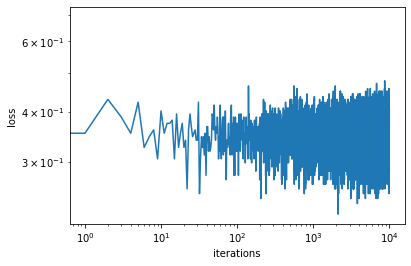

In [3]:
a = SGD(b=100)
X = np.random.rand(5000,50)
y = np.random.randint(2,size=5000)
SGD.fit(a,X,y,n_epochs=10000,plot=True)